In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [16]:
# 1. Charger les données

# Load train and test data
data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\data.csv")
train_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\train_data.csv")
test_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\test_data.csv")

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

# generation

In [17]:
y_train1 = train_data["max_generation(mw)"]
X_train1 = train_data.drop(columns=["total_demand(mw)", "max_generation(mw)"])
y_test1  = test_data["max_generation(mw)"]
X_test1 = test_data.drop(columns=["total_demand(mw)", "max_generation(mw)"])
# 5. Entraîner le modèle SARIMAX (simple configuration)
model1 = SARIMAX(y_train1,
                exog=X_train1,
                order=(0, 0, 0) ,  # Ajustable
                seasonal_order=(0, 1, 0, 365),  # Pas de composante saisonnière pour simplifier
                enforce_stationarity=False,
                enforce_invertibility=False)

results1 = model1.fit(disp=False)

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
# 6. Prédictions
pred1 = results1.predict(start=len(y_train1), end=len(y_train1)+len(y_test1)-1, exog=X_test1)

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
import pickle

In [20]:
# 7. Évaluation

# Charger la variable depuis le fichier
with open('JoursAssurées.pkl', 'rb') as f:
    JoursAssurées = pickle.load(f)
JoursAssurées=JoursAssurées.values
JoursAssuréesPredit = (pred1.values - test_data["total_demand(mw)"].values) > 0

count=0
for i in range(0, len(JoursAssurées)):
    if JoursAssurées[i] == JoursAssuréesPredit[i]:
        count = count + 1
print("La précision est ", count/len(JoursAssurées) * 100, "%")

La précision est  58.31134564643799 %


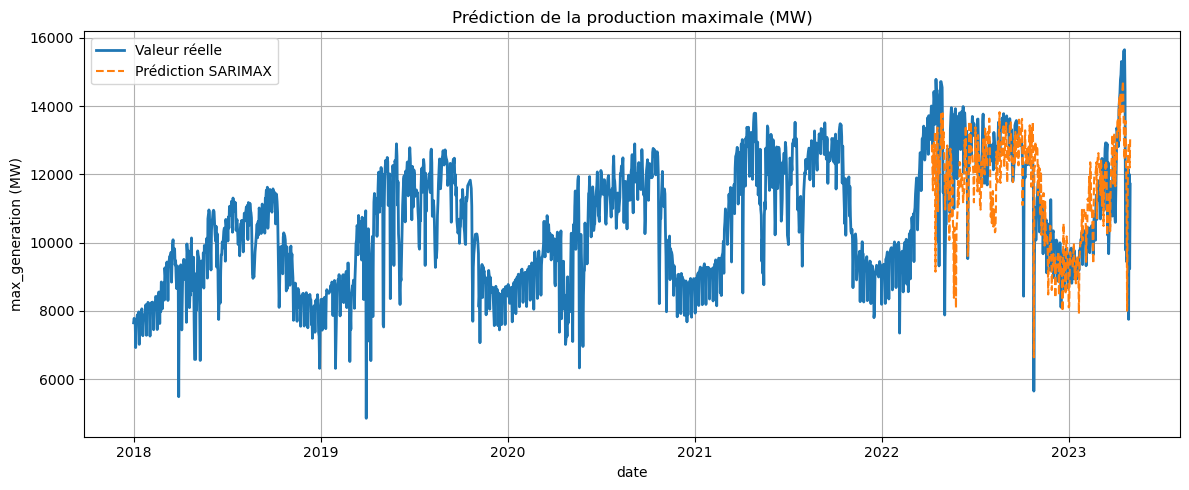

In [21]:
# 8. Visualisation
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['max_generation(mw)'], label='Valeur réelle', linewidth=2)
plt.plot(y_test1.index, pred1, label='Prédiction SARIMAX', linestyle='--')
plt.legend()
plt.title(f'Prédiction de la production maximale (MW)')
plt.xlabel('date')
plt.ylabel('max_generation (MW)')
plt.grid(True)
plt.tight_layout()
# Assuming the last date in the index is your starting date
start_date = data.index[-1] + pd.Timedelta(days=1)
# Generate a date range for 1 year
date_range_for_year = pd.date_range(start=start_date, periods=365, freq='D')  # Adjust 'periods' for leap year
plt.show()